<a href="https://colab.research.google.com/github/SoulINdUsT/machine-learning-lab/blob/2nd/RF%2CDT%2CKNN%2CNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-learn pandas matplotlib seaborn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/DS/Retinopathy_Debrecen.csv')

In [6]:
df

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [9]:
df.value_counts("class")

,count
class,
1,611
0,540


In [11]:
df.head()

,quality,pre_screening,ma1,ma2,ma3,ma4,ma5,ma6,exudate1,exudate2,exudate3,exudate5,exudate6,exudate7,exudate8,macula_opticdisc_distance,opticdisc_diameter,am_fm_classification,class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [12]:
print(df.columns.tolist())

['quality', 'pre_screening', 'ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6', 'exudate1', 'exudate2', 'exudate3', 'exudate5', 'exudate6', 'exudate7', 'exudate8', 'macula_opticdisc_distance', 'opticdisc_diameter', 'am_fm_classification', 'class']


In [13]:
print("Rows:", df.shape[0], " Columns:", df.shape[1])

Rows: 1151  Columns: 19


In [14]:
print(df.describe())

           quality  pre_screening          ma1          ma2          ma3  \
count  1151.000000    1151.000000  1151.000000  1151.000000  1151.000000   
mean      0.996525       0.918332    38.428323    36.909644    35.140747   
std       0.058874       0.273977    25.620913    24.105612    22.805400   
min       0.000000       0.000000     1.000000     1.000000     1.000000   
25%       1.000000       1.000000    16.000000    16.000000    15.000000   
50%       1.000000       1.000000    35.000000    35.000000    32.000000   
75%       1.000000       1.000000    55.000000    53.000000    51.000000   
max       1.000000       1.000000   151.000000   132.000000   120.000000   

               ma4          ma5          ma6     exudate1     exudate2  \
count  1151.000000  1151.000000  1151.000000  1151.000000  1151.000000   
mean     32.297133    28.747176    21.151173    64.096674    23.088012   
std      21.114767    19.509227    15.101560    58.485289    21.602696   
min       1.000000 


🔹 Class distribution in 'class':
class
1    611
0    540
Name: count, dtype: int64


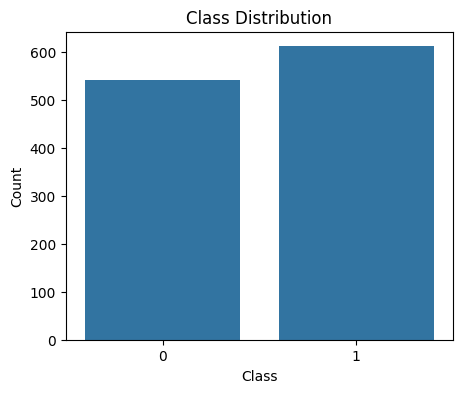

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

target_column = df.columns[-1]

print(df[target_column].value_counts())


plt.figure(figsize=(5, 4))
sns.countplot(x=df[target_column])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-3270020363.py:11: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


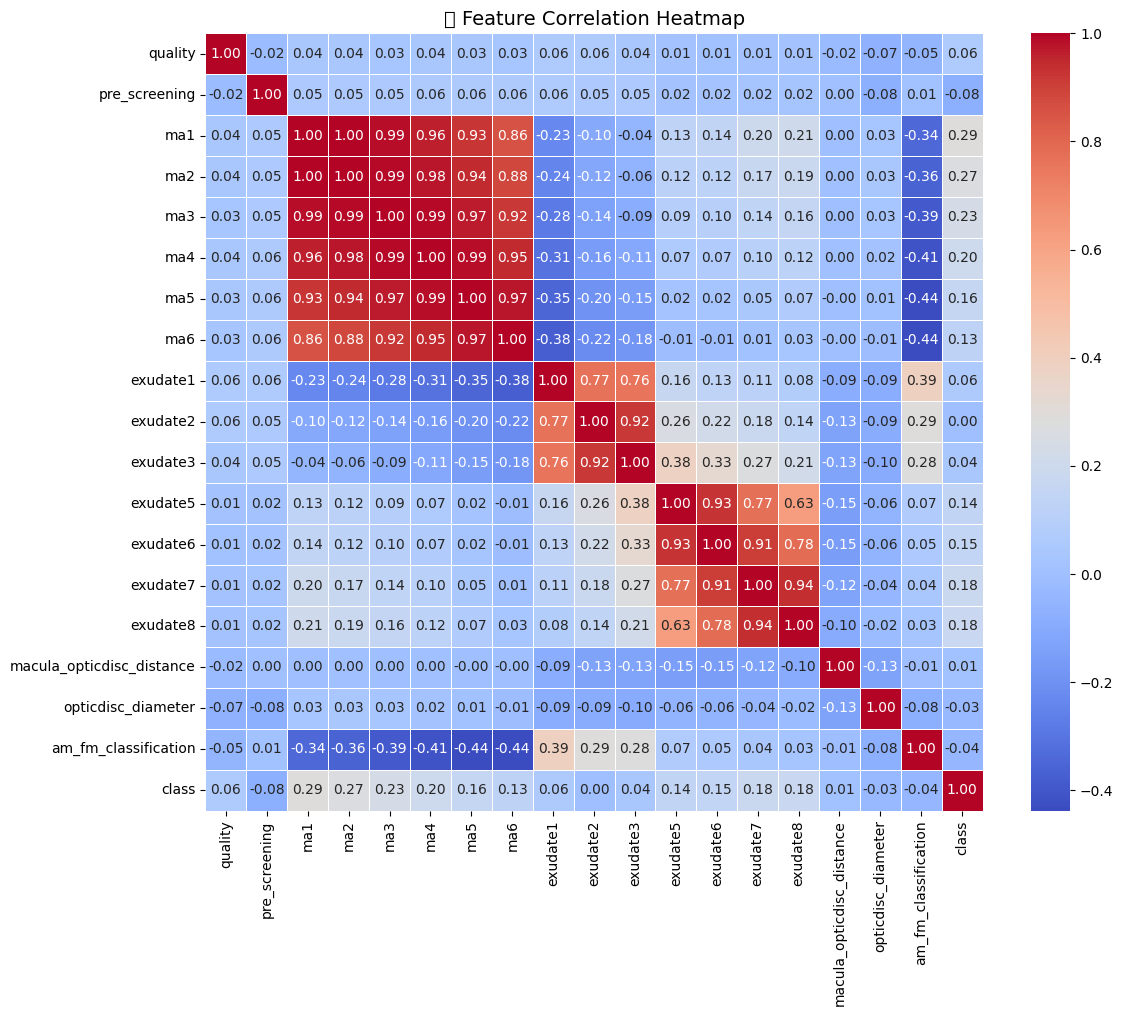

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("🔷 Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [19]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr().abs()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print(f"🔹 Features to drop due to high correlation: {to_drop}")


data_reduced = df.drop(columns=to_drop)

🔹 Features to drop due to high correlation: ['ma2', 'ma3', 'ma4', 'ma5', 'ma6', 'exudate3', 'exudate6', 'exudate7', 'exudate8']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = data_reduced.drop(columns=data_reduced.columns[-1])
y = data_reduced[data_reduced.columns[-1]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
#models evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n===== {name} Evaluation =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


===== Decision Tree Evaluation =====
Accuracy: 0.615606936416185
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58       155
           1       0.65      0.64      0.65       191

    accuracy                           0.62       346
   macro avg       0.61      0.61      0.61       346
weighted avg       0.62      0.62      0.62       346


===== Random Forest Evaluation =====
Accuracy: 0.6676300578034682
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67       155
           1       0.75      0.60      0.67       191

    accuracy                           0.67       346
   macro avg       0.68      0.68      0.67       346
weighted avg       0.68      0.67      0.67       346


===== K-Nearest Neighbors Evaluation =====
Accuracy: 0.615606936416185
Classification Report:
               precision    recall  f1-score   support

           0  

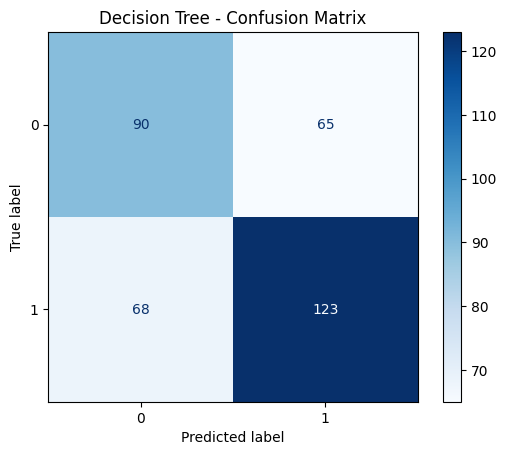

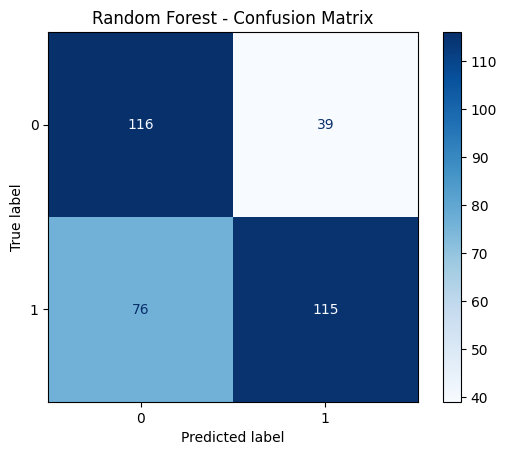

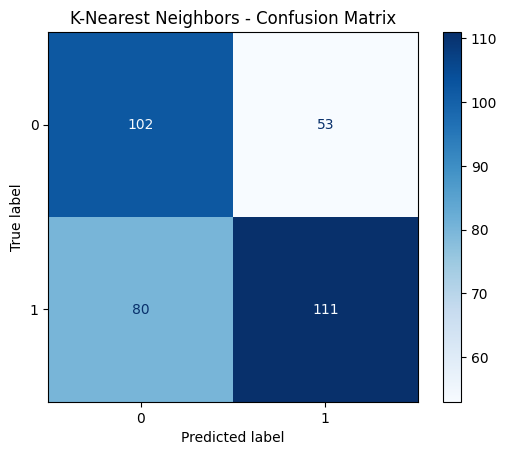

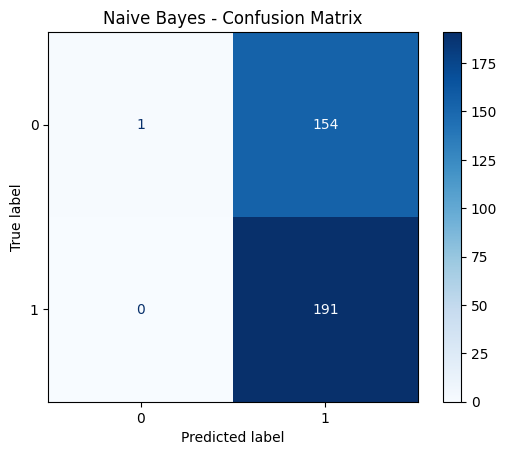

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

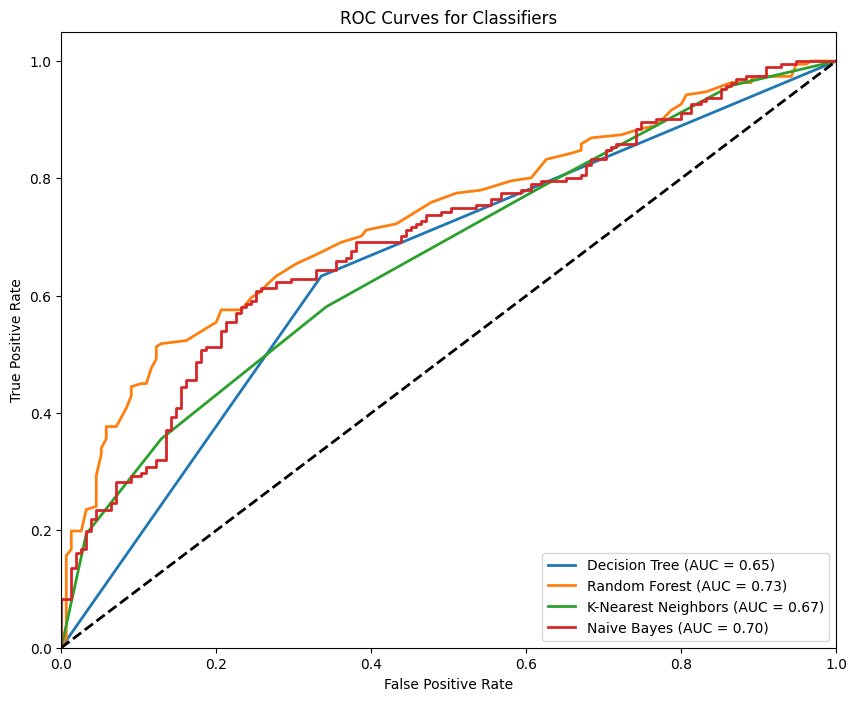

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# Binarize output for multi-class (if needed)
classes = y.unique()
if len(classes) > 2:
    y_bin = label_binarize(y, classes=classes)
else:
    y_bin = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

plt.figure(figsize=(10,8))

for name, model in models.items():
    if len(classes) > 2:

        classifier = OneVsRestClassifier(model)
        y_train_bin = label_binarize(y_train, classes=classes)
        y_test_bin = label_binarize(y_test, classes=classes)
        classifier.fit(X_train, y_train_bin)
        y_score = classifier.predict_proba(X_test)


        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(classes)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        for i in range(len(classes)):
            plt.plot(fpr[i], tpr[i], lw=2, label=f'{name} class {classes[i]} (AUC = {roc_auc[i]:0.2f})')

    else:

        model.fit(X_train, y_train)
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test accuracy with best RF:", accuracy_score(y_test, y_pred))


Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.6608695652173913
Test accuracy with best RF: 0.661849710982659
